In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_3032b2439ebd429882097d9e71584e90 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0L9JKR0MK73oxI6LktSKykXyQupRDp069_Ls4KwY16ur',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3032b2439ebd429882097d9e71584e90.get_object(Bucket='employeeattritionprediction-donotdelete-pr-m3c6rd3rqpexwo',Key='employee_attrition.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,Age,Department,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,41,Sales,2,Female,2,4,5993,19479,Yes,11,3,6,4,0,Yes
1,49,Research & Development,3,Male,2,2,5130,24907,No,23,4,10,7,1,No
2,37,Research & Development,4,Male,1,3,2090,2396,Yes,15,3,0,0,0,Yes
3,33,Research & Development,4,Female,1,3,2909,23159,Yes,11,3,8,7,3,No
4,27,Research & Development,1,Male,1,2,3468,16632,No,12,3,2,2,2,No


In [3]:
dataset.isnull().any()

Age                        False
Department                 False
EnvironmentSatisfaction    False
Gender                     False
JobLevel                   False
JobSatisfaction            False
MonthlyIncome              False
MonthlyRate                False
OverTime                   False
PercentSalaryHike          False
PerformanceRating          False
YearsAtCompany             False
YearsInCurrentRole         False
YearsSinceLastPromotion    False
Attrition                  False
dtype: bool

In [3]:
dataset.corr()

,Age,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
Age,1.000000,-0.075234,0.519813,-0.065572,0.509927,-0.029206,-0.068962,0.024815,0.336463,0.227841,0.197549
EnvironmentSatisfaction,-0.075234,1.000000,-0.089060,0.049150,-0.101238,-0.102443,-0.109606,-0.134736,-0.061696,-0.075233,-0.053293
JobLevel,0.519813,-0.089060,1.000000,0.021611,0.949796,0.059110,-0.142860,-0.100194,0.576786,0.498994,0.478078
JobSatisfaction,-0.065572,0.049150,0.021611,1.000000,0.007998,0.063698,-0.040177,-0.065818,0.032070,-0.008924,-0.017174
MonthlyIncome,0.509927,-0.101238,0.949796,0.007998,1.000000,0.053460,-0.138066,-0.104936,0.549832,0.463170,0.474115
MonthlyRate,-0.029206,-0.102443,0.059110,0.063698,0.053460,1.000000,-0.074552,-0.092463,-0.080049,-0.070025,-0.161449
PercentSalaryHike,-0.068962,-0.109606,-0.142860,-0.040177,-0.138066,-0.074552,1.000000,0.833681,-0.077003,-0.091042,-0.042685
PerformanceRating,0.024815,-0.134736,-0.100194,-0.065818,-0.104936,-0.092463,0.833681,1.000000,-0.020756,-0.040821,0.008324
YearsAtCompany,0.336463,-0.061696,0.576786,0.032070,0.549832,-0.080049,-0.077003,-0.020756,1.000000,0.791276,0.657272
YearsInCurrentRole,0.227841,-0.075233,0.498994,-0.008924,0.463170,-0.070025,-0.091042,-0.040821,0.791276,1.000000,0.607879


In [4]:
import seaborn as sns 

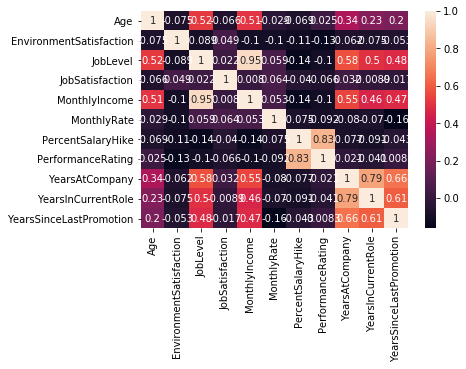

In [5]:
sns.heatmap(dataset.corr(),annot=True)

In [4]:
x=dataset.iloc[:,0:14].values

In [5]:
x

array([[41, 'Sales', 2, ..., 6, 4, 0],
       [49, 'Research & Development', 3, ..., 10, 7, 1],
       [37, 'Research & Development', 4, ..., 0, 0, 0],
       ..., 
       [35, 'Research & Development', 2, ..., 6, 2, 1],
       [42, 'Research & Development', 3, ..., 5, 3, 0],
       [38, 'Research & Development', 4, ..., 1, 0, 0]], dtype=object)

In [6]:
y=dataset.iloc[:,14:].values

In [7]:
y

array([['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'

In [8]:
 from sklearn.preprocessing import LabelEncoder

In [9]:
lb=LabelEncoder()

In [10]:
x[:,1]=lb.fit_transform(x[:,1])

In [11]:
lb1=LabelEncoder()
x[:,3]=lb1.fit_transform(x[:,3])

In [12]:
lb2=LabelEncoder()
x[:,8]=lb2.fit_transform(x[:,8])

In [74]:
lb1.classes_

array(['Female', 'Male'], dtype=object)

In [14]:
y[:,0]=lb.fit_transform(y[:,0])

In [15]:
y

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
x_train

array([[45, 0, 2, ..., 17, 9, 0],
       [36, 0, 2, ..., 6, 5, 0],
       [32, 0, 2, ..., 10, 2, 6],
       ..., 
       [36, 1, 2, ..., 9, 7, 2],
       [37, 0, 2, ..., 1, 0, 0],
       [36, 0, 4, ..., 8, 7, 7]], dtype=object)

In [19]:
x_test

array([[53, 1, 1, 0, 4, 4, 15427, 22021, 0, 16, 3, 25, 8, 3],
       [32, 0, 3, 1, 1, 3, 3038, 12430, 0, 20, 4, 5, 4, 1],
       [50, 0, 1, 0, 5, 2, 18172, 9755, 1, 19, 3, 8, 3, 0],
       [30, 1, 3, 0, 2, 2, 5209, 19760, 1, 12, 3, 11, 8, 2],
       [33, 0, 3, 1, 1, 4, 2500, 10515, 0, 14, 3, 3, 1, 0],
       [50, 0, 3, 1, 1, 3, 3690, 3425, 0, 15, 3, 3, 2, 0],
       [32, 0, 4, 1, 1, 4, 3068, 11864, 0, 13, 3, 7, 7, 3],
       [30, 0, 3, 1, 2, 4, 6347, 13982, 1, 19, 3, 11, 9, 4],
       [31, 0, 1, 1, 1, 3, 2911, 15170, 0, 17, 3, 5, 2, 4],
       [22, 0, 3, 1, 1, 4, 2323, 11992, 0, 24, 4, 2, 2, 2],
       [38, 0, 4, 0, 2, 4, 2406, 5456, 0, 11, 3, 10, 3, 9],
       [31, 1, 2, 1, 2, 3, 6172, 20739, 1, 18, 3, 7, 7, 7],
       [27, 0, 3, 1, 1, 3, 2566, 25326, 1, 15, 3, 1, 1, 0],
       [30, 0, 4, 0, 1, 1, 3204, 10415, 0, 14, 3, 3, 2, 2],
       [30, 0, 4, 1, 2, 4, 5126, 15998, 1, 12, 3, 10, 8, 3],
       [30, 0, 4, 1, 1, 3, 2693, 13335, 0, 22, 4, 1, 0, 0],
       [39, 1, 4, 1, 2, 4, 2086, 333

In [20]:
y_train

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [21]:
y_train=y_train.astype('int')

In [22]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=object)

In [46]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('scalar',sc),('kn',knn)])

In [47]:
model=pipeline.fit(x_train,y_train)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
y_pred=knn.predict(x_test)

In [52]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [54]:
y_test=y_test.astype('int')

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
print("Accuracy score:",accuracy_score(y_test,y_pred)*100,"%")

Accuracy score: 82.5 %


In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,32,4
1,3,1


In [59]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

In [60]:
roc_auc

0.56944444444444442

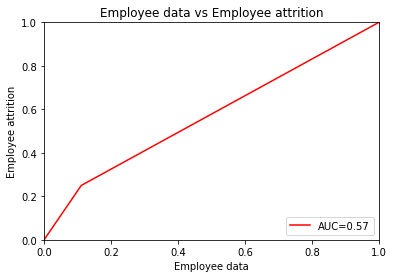

In [61]:
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc,color="red")
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Employee data")
plt.ylabel("Employee attrition")
plt.title("Employee data vs Employee attrition")
plt.show()

In [62]:
!pip install watson-machine-learning-client --upgrade

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.0.365)
Requirement not upgraded as not directly required: lomond in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.1.13)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.21.0)
Requirement not upgraded as not directly required: tabulate in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.8.2)
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.0.1)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2019.3.9)
Requirement not upgraded as not di

In [63]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [64]:
wml_credentials={"url":"https://eu-gb.ml.cloud.ibm.com",
                 "access_key":"814edUwidBPAo0FzUbjtNRYGqaTsRu042w19Y8JLTCoi",
                 "username":"88632294-f105-416c-8803-b3c5a1e3c1b9",
                 "password":"abb8f456-133f-4bca-91e1-01eed99c6952",
                 "instance_id":"de1c3184-06fa-4d87-9d99-2cc85c30b5b1"}

In [65]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [66]:
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:"Durga",
             client.repository.ModelMetaNames.AUTHOR_EMAIL:"durgalakshmi2016@gmail.com",
             client.repository.ModelMetaNames.NAME:"employee attrition prediction"}
    

In [67]:
model_s=client.repository.store_model(model,meta_props=model_props)

In [68]:
client.repository.list()

------------------------------------  -----------------------------  ------------------------  -----------------  -----------------
GUID                                  NAME                           CREATED                   FRAMEWORK          TYPE
20abff61-93de-43cd-9313-6c4f5b841082  employee attrition prediction  2019-06-28T09:55:00.085Z  scikit-learn-0.19  model
c6454149-48dc-4181-b456-ea1de5ad0788  employee attrition prediction  2019-06-28T05:32:39.597Z  scikit-learn-0.19  model
2e301bd7-da99-45f0-8b45-01005fc36727  employee attrition prediction  2019-06-28T05:32:49.845Z  scikit-learn-0.19  online deployment
------------------------------------  -----------------------------  ------------------------  -----------------  -----------------


In [69]:
published_model_uid=client.repository.get_model_uid(model_s)

In [70]:
published_model_uid

'20abff61-93de-43cd-9313-6c4f5b841082'

In [71]:
d=client.deployments.create(published_model_uid,name="employee attrition prediction")



#######################################################################################

Synchronous deployment creation for uid: '20abff61-93de-43cd-9313-6c4f5b841082' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ae44de94-c5fa-4b0b-a301-5728d092bdb5'
------------------------------------------------------------------------------------------------




In [72]:
scoring_endpoint=client.deployments.get_scoring_url(d)

In [73]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/de1c3184-06fa-4d87-9d99-2cc85c30b5b1/deployments/ae44de94-c5fa-4b0b-a301-5728d092bdb5/online'